In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

### Perceptron model for Iris Classification

We will load the Iris data and build a binary classifier that takes as an input two features
- x1 = petal length and x2 = petal width

It will output:
- 1 = Iris-Setosa and 0 = Not Iris-Setosa

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

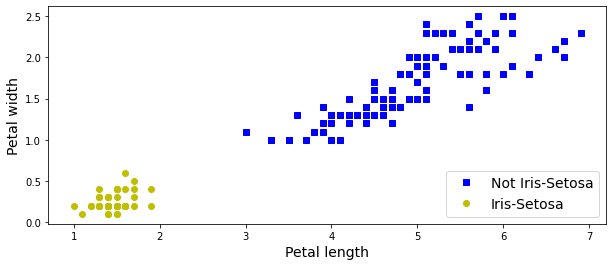

In [3]:
# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

In [4]:
# How many data points does our data set contiain?
iris.data.shape

(150, 4)

In [5]:
# Split into training and testing data but take a small test size since our data set is so small
RN = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, stratify=y, random_state=RN)

In [6]:
Perceptron?

Here are all the inputs for the Perceptron function:

Perceptron(
    - penalty=None, "What kind of regularization"
    - alpha=0.0001, "Multiplies the regularization term - how much regularization"
    - fit_intercept=True,
    - max_iter=1000, "How many times to pass through the dataset when fitting"
    - tol=0.001, "Stopping criterion - stop when the thetas stop changing"
    - shuffle=True,
    - verbose=0, "set to 0, 1, 2, or 3 to get more feeback from the code"
    - eta0=1.0, "This is our learning rate"
    - n_jobs=None,
    - random_state=0,
    - early_stopping=False,
    - validation_fraction=0.1,
    - n_iter_no_change=5,
    - class_weight=None, 
    - warm_start=False,
)

In [7]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=RN, verbose=1)
per_clf.fit(X_train, y_train)

-- Epoch 1
Norm: 3.48, NNZs: 2, Bias: 5.000000, T: 135, Avg. loss: 0.255778
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.48, NNZs: 2, Bias: 5.000000, T: 270, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.48, NNZs: 2, Bias: 5.000000, T: 405, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.48, NNZs: 2, Bias: 5.000000, T: 540, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.48, NNZs: 2, Bias: 5.000000, T: 675, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.48, NNZs: 2, Bias: 5.000000, T: 810, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.48, NNZs: 2, Bias: 5.000000, T: 945, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=10, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=1, warm_start=False)

##### What would we expect the point [2, 0.5] to be? Look back at the graph of the data!

In [8]:
# It should output 1 = iris-setosa
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


In [9]:
# Lets look at the coefficients that were saved by the model using
print(per_clf.coef_)
print(per_clf.intercept_)

[[-1.1 -3.3]]
[5.]


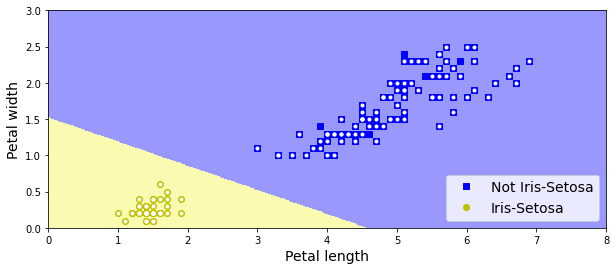

In [10]:
axes = [0, 8, 0, 3]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "w.")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "w.")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

It turns out SGDClassifier with (loss="perceptron", learning_rate="constant", eta0=1, and penalty=None) is the same as the Perceptron function above.

In [11]:
# Report our accuracy
y_predict=per_clf.predict(X_test)
score=y_predict==y_test
print("Testing Accuracy: ", score.sum()/len(score))

y_predict=per_clf.predict(X_train)
score=y_predict==y_train
print("Training Accuracy: ", score.sum()/len(score))


Testing Accuracy:  1.0
Training Accuracy:  1.0


#### Strengths and Weaknesses

- The Perceptron is simple and fairly quick to train
- The output is based on a hard threshold - only outputs zeros or ones, unlike Logistic Regression which can output a probability that object is classified in that class.
- They are too simple - our more complicated logic gates (ex. XOR) cannot be represented by a perceptron because they have hidden layers. 

### MLP - Multilayer Perceptron

- You can combine multiple perceptrons to solve more complicated problems like XOR.
- These are harder to train and we need to learn about Backpropagation to train more complicated models (coming soon!)